In [1]:
import pandas as pd

In [2]:
a = pd.read_csv(r"C:\Users\91845\Downloads\airquality.csv")

In [3]:
a.head(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
0,1,41.0,190.0,7.4,67,5,1,high
1,2,36.0,118.0,8.0,72,5,2,high
2,3,12.0,149.0,12.6,74,5,3,high
3,4,18.0,313.0,11.5,62,5,4,high
4,5,NaN,NaN,14.3,56,5,5,high
5,6,28.0,NaN,14.9,66,5,6,high
6,7,23.0,299.0,8.6,65,5,7,low
7,8,19.0,99.0,13.8,59,5,8,low
8,9,8.0,19.0,20.1,61,5,9,low
9,10,NaN,194.0,8.6,69,5,10,low


### Task:1 - Data Cleaning

In [4]:
a.isnull().sum()

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
Month          0
Day            0
humidity       4
dtype: int64

In [5]:
df = a.drop("Unnamed: 0", axis=1)

In [6]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
0,41.0,190.0,7.4,67,5,1,high
1,36.0,118.0,8.0,72,5,2,high
2,12.0,149.0,12.6,74,5,3,high
3,18.0,313.0,11.5,62,5,4,high
4,NaN,NaN,14.3,56,5,5,high
...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,high
149,NaN,145.0,13.2,77,9,27,high
150,14.0,191.0,14.3,75,9,28,high
151,18.0,131.0,8.0,76,9,29,high


In [7]:
#filling null numerical values using mean
df["Ozone"] = df["Ozone"].fillna(df["Ozone"].mean())
df["Solar.R"] = df["Solar.R"].fillna(df["Solar.R"].mean())

In [8]:
#filling categorical null values by mode
df["humidity"] = df["humidity"].fillna(df["humidity"].mode()[0])

In [9]:
df.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
humidity    0
dtype: int64

### Task:2 - Data Transformation

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
l = LabelEncoder()

In [12]:
df["humidity"] = l.fit_transform(df["humidity"] )

In [13]:
df["humidity"].unique()

array([0, 1, 2])

In [14]:
df.dtypes

Ozone       float64
Solar.R     float64
Wind        float64
Temp          int64
Month         int64
Day           int64
humidity      int32
dtype: object

### Task:3 - Data Transformation

#### a) Graphs using seaborn

In [15]:
import seaborn as sns

In [16]:
corr = df.corr()
corr

,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
Ozone,1.000000,0.302970,-0.530936,0.608742,0.149081,-0.011355,0.155033
Solar.R,0.302970,1.000000,-0.055245,0.262569,-0.072904,-0.145621,-0.007810
Wind,-0.530936,-0.055245,1.000000,-0.457988,-0.178293,0.027181,-0.069561
Temp,0.608742,0.262569,-0.457988,1.000000,0.420947,-0.130593,0.013594
Month,0.149081,-0.072904,-0.178293,0.420947,1.000000,-0.007962,-0.188220
Day,-0.011355,-0.145621,0.027181,-0.130593,-0.007962,1.000000,0.091986
humidity,0.155033,-0.007810,-0.069561,0.013594,-0.188220,0.091986,1.000000


<AxesSubplot:>

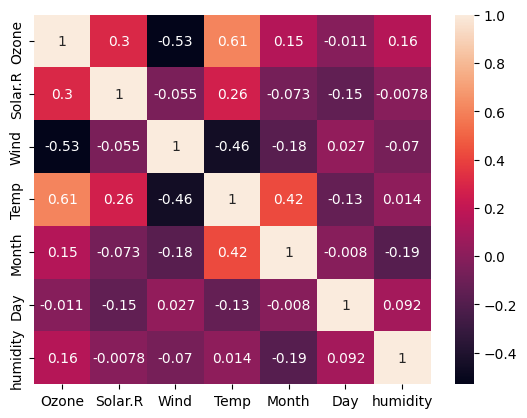

In [17]:
sns.heatmap(corr, annot = True)

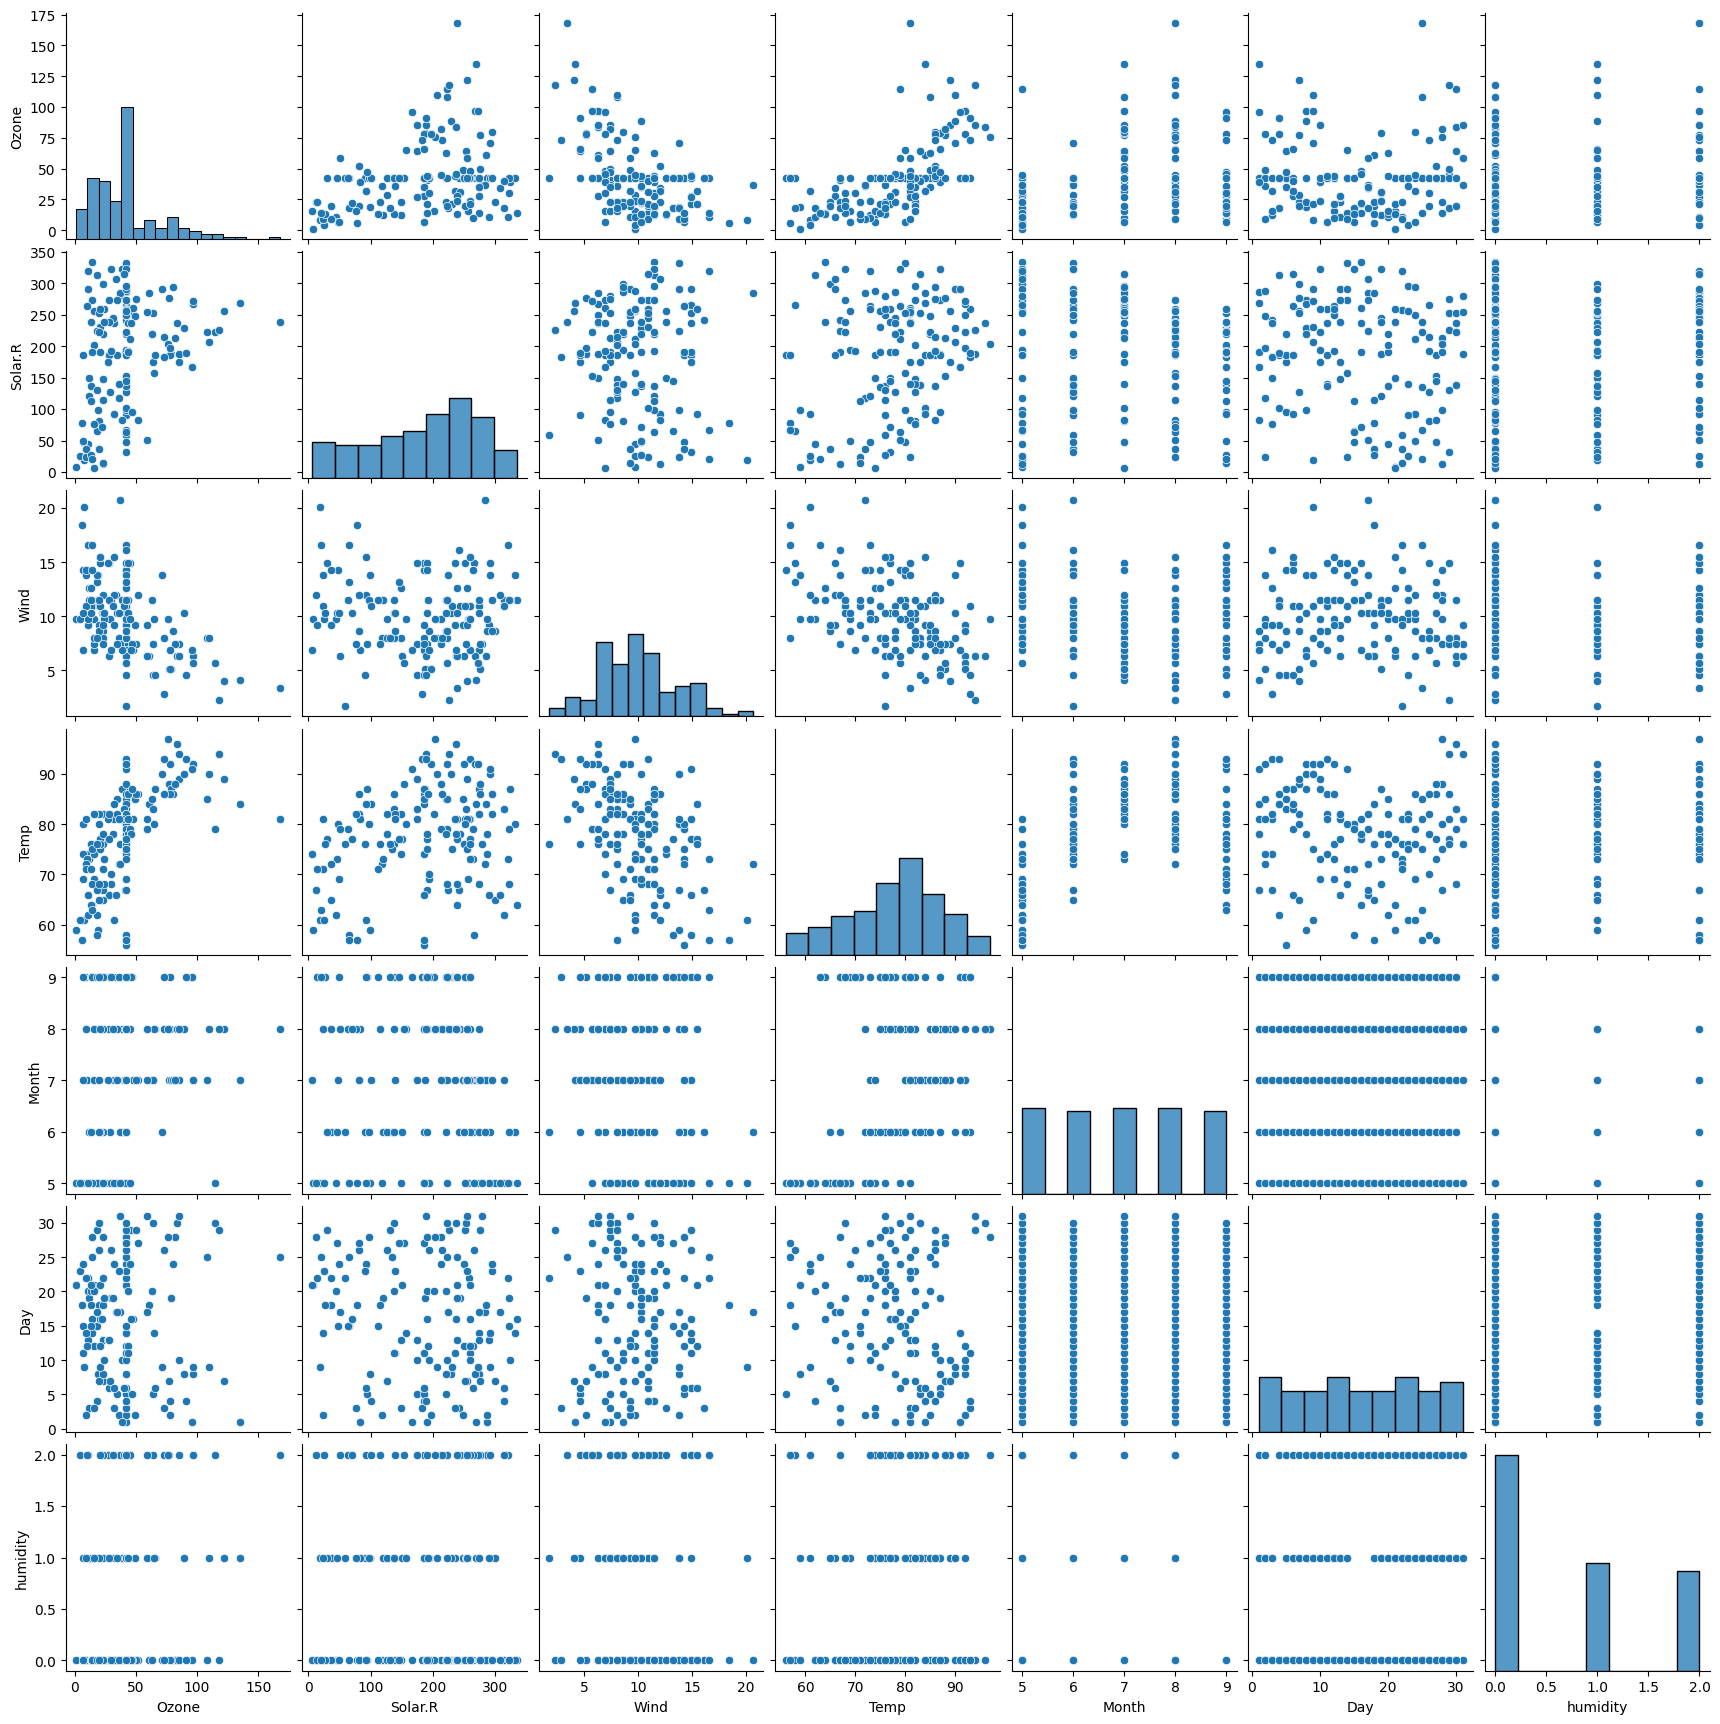

In [18]:
sns.pairplot(df)

<AxesSubplot:xlabel='Month', ylabel='Temp'>

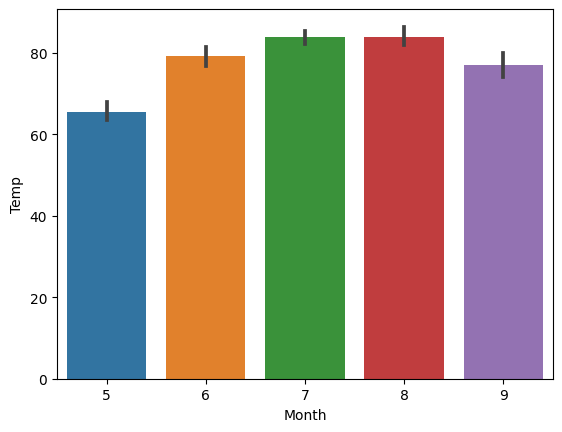

In [19]:
sns.barplot(x=df["Month"], y=df["Temp"])

<AxesSubplot:xlabel='Month', ylabel='Temp'>

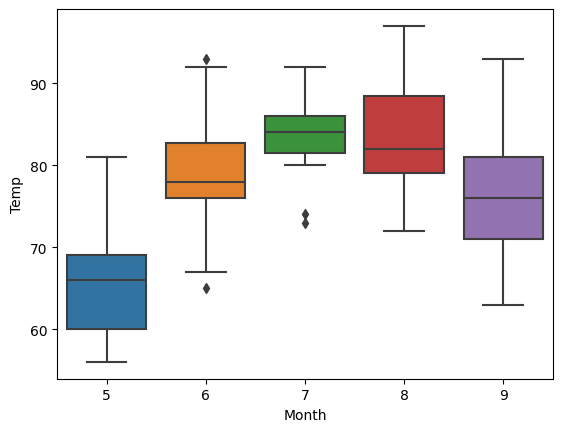

In [20]:
sns.boxplot(x=df["Month"], y=df["Temp"])

#### b) Graphs using matplotlib.py

In [21]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Ozone Vs Temp')

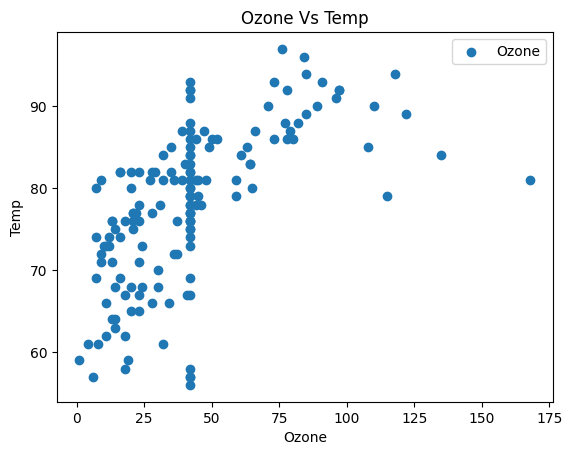

In [22]:
plt.scatter(x=df["Ozone"], y=df["Temp"])
plt.legend(["Ozone"])
plt.xlabel("Ozone")
plt.ylabel("Temp")
plt.title("Ozone Vs Temp")
#plt.show()

Text(0.5, 1.0, 'Line graph for Ozone and Temp')

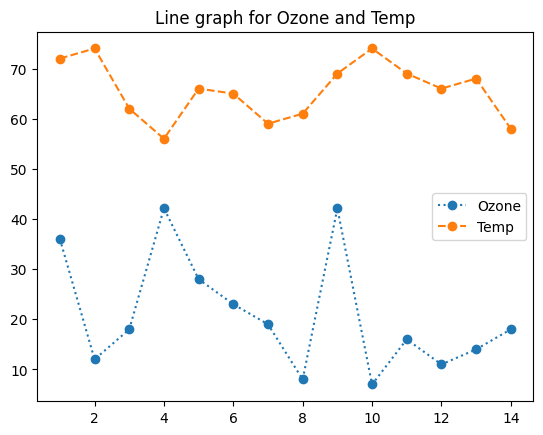

In [23]:
h = df.iloc[1:15 ,0]
plt.plot(h, label="Ozone", marker="o", linestyle="dotted")

v = df.iloc[1:15, 3]
plt.plot(v, label="Temp", marker="o", linestyle="dashed")

plt.legend(["Ozone", "Temp"])
plt.title("Line graph for Ozone and Temp")

Text(0.5, 1.0, 'Airquality Factors')

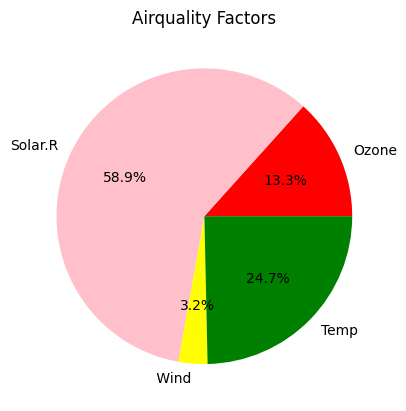

In [24]:
sizes = [df["Ozone"].mean(), df["Solar.R"].mean(), df["Wind"].mean(), df["Temp"].mean()]
labels = ["Ozone", "Solar.R"," Wind", "Temp"]
colors = ["red","pink","yellow","green"]
plt.pie(sizes, labels= labels, colors=colors, autopct="%1.1f%%")
plt.title("Airquality Factors")

Text(0.5, 0, 'Humidity')

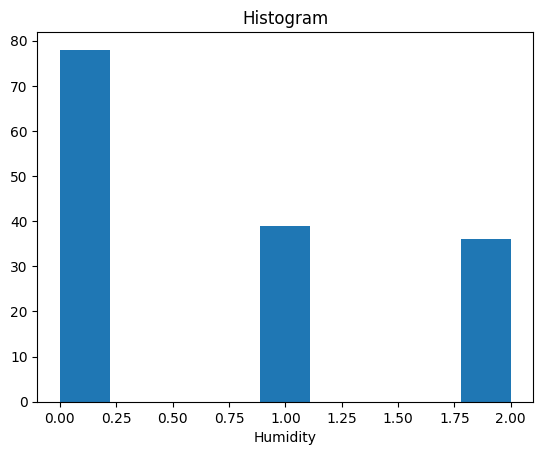

In [25]:
h = df.iloc[:,-1]
plt.hist(h,bins="auto")
plt.title("Histogram")
plt.xlabel("Humidity")

(-0.5, 4449.5, 2224.5, -0.5)

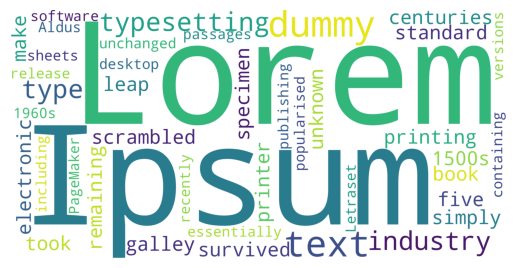

In [26]:
from wordcloud import WordCloud, STOPWORDS
text = open("WordCloud.txt").read()
wrd_cld = WordCloud(background_color="white", height=2225, width=4450).generate(text)
plt.imshow(wrd_cld)
plt.axis("off")